In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns


In [2]:
DataF=pd.read_csv('EV_cars.csv')


The next point shows a list of variables for diferent electrical cars:

Battery: Capacity of batery kWh.

Car_name: Name of car.

Car_name_link: link for more information.

Efficiency: Efficiency in Wh/km.

Fast_charge: Capacity of charging km/h.

Price.DE.: Price in Germany in euros.

Range: Autonomy in km.

Top_speed: Maximun speed in km/h.

Acceleration..0.100.: Acceleration from  0 to 100 km/h in seconds.


In [3]:
DataF.head(10)
#a basic exploration for data

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4
5,57.5,Tesla Model Y,https://ev-database.org/car/1743/Tesla-Model-Y,164,580.0,47567.0,350,217,6.9
6,71.0,BMW iX xDrive40,https://ev-database.org/car/1472/BMW-iX-xDrive40,197,480.0,77300.0,360,200,6.1
7,64.0,Volvo EX30 Single Motor ER,https://ev-database.org/car/1910/Volvo-EX30-Si...,173,550.0,41790.0,370,180,5.3
8,44.0,Citroen e-C3,https://ev-database.org/car/2039/Citroen-e-C3,176,320.0,23300.0,250,135,11.0
9,82.5,BYD SEAL 82.5 kWh AWD Excellence,https://ev-database.org/car/2002/BYD-SEAL-825-...,170,530.0,53668.0,485,180,3.8


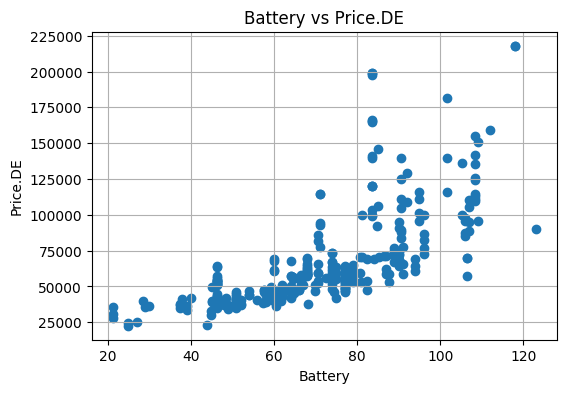

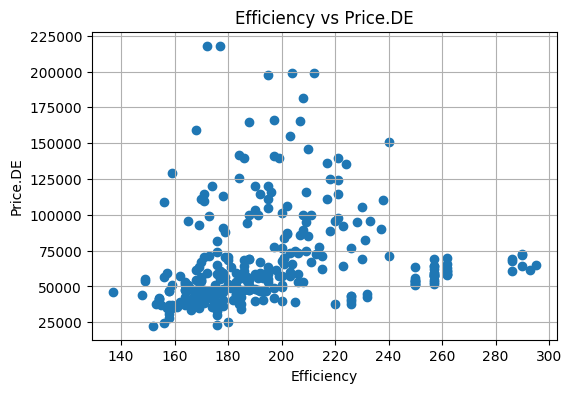

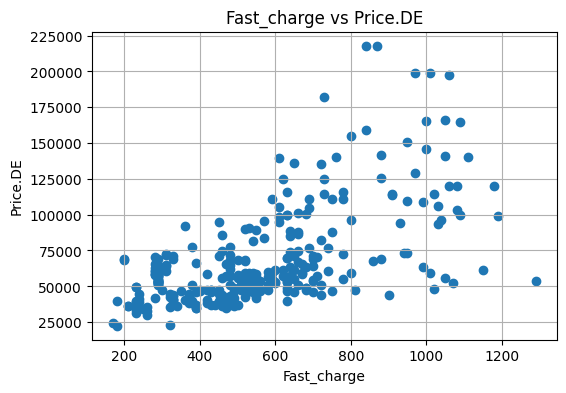

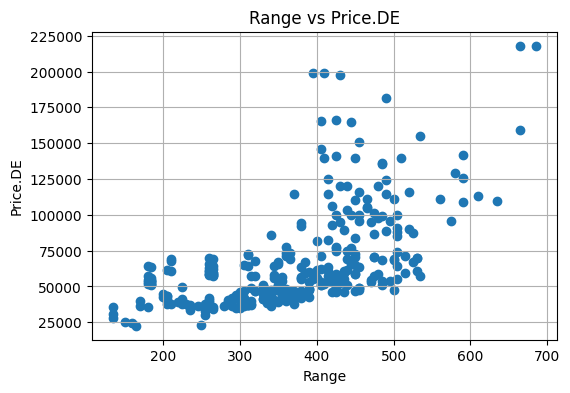

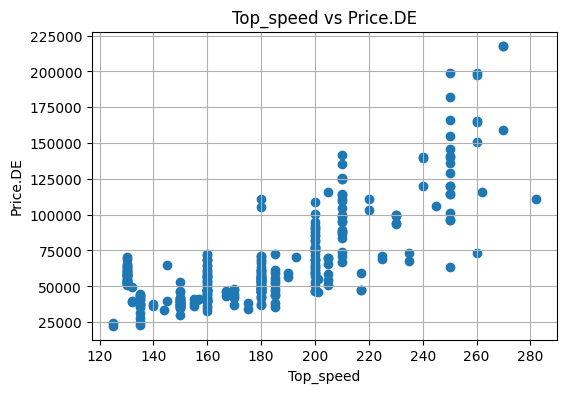

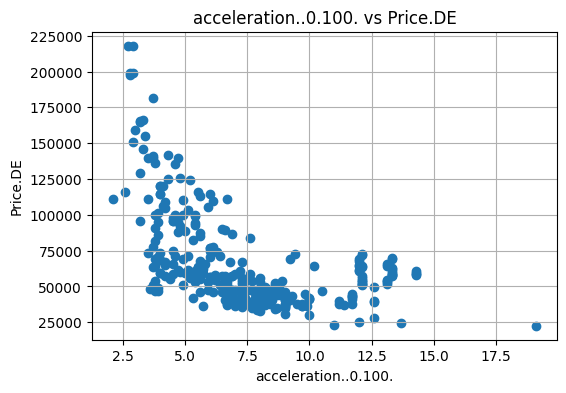

In [4]:
#At this section it shows the relation between the numerical variables: Battery, Efficiency, Fast_charge, Range, Top_speed, acceleration..0.100 vs 'Price.DE' 
#through scatter graphics
numerical_series=DataF[['Battery', 'Efficiency', 'Fast_charge', 'Range', 'Top_speed', 'acceleration..0.100.']]
for graphics in numerical_series:
   plt.figure(figsize=(6,4))
   plt.scatter(x=DataF[graphics], y=DataF['Price.DE.'])
   plt.title(f'{graphics} vs Price.DE')
   plt.xlabel(graphics)
   plt.ylabel("Price.DE")
   plt.grid(True)

<Axes: >

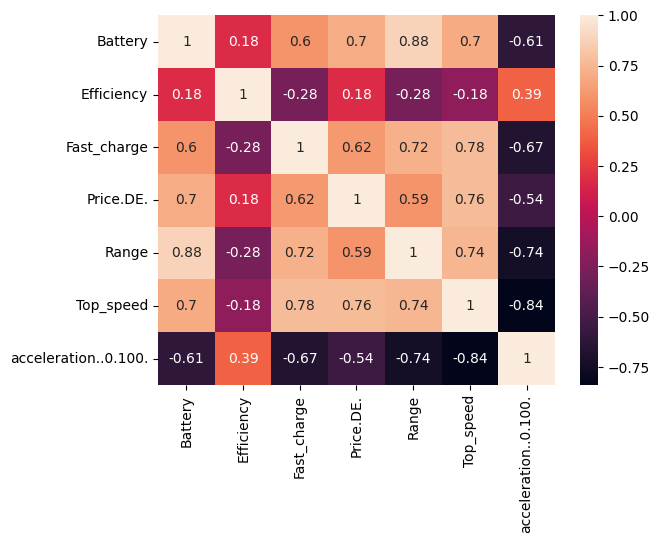

In [5]:

sns.heatmap(data=DataF.select_dtypes('number').corr(), annot=True)
#Each cell in the matrix displays the correlation coefficient between two variables. Typically,
#pearson's correlation coefficient is used for measuring linear relationships between continuous variables.

In [6]:
#import the proper libraries for the model, in this case "LinearRegression"
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#Preprocesing data, remove irrelevent information and empty cells
DataF_New=DataF.drop(['Car_name', 'Car_name_link'], axis=1)
DataF_New=DataF_New.dropna()
#Define the independet variables and variable dependent, in this case Price.DE for prediction.
x=DataF_New.drop(columns=['Price.DE.'])
y=DataF_New['Price.DE.']
print(f" {len(x)}")
print(f" {len(y)}")
#Divide data for training and testing 
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=25, random_state=11)
#Model training 
model=LinearRegression()
model.fit(x_train, y_train)
#prediction
prediction =model.predict(x_test)
print (prediction)
#model evalution 
MSE=mean_squared_error(y_test, prediction)
r2 = r2_score(y_test,prediction)
print (MSE)
print(r2)

 307
 307
[ 56667.43592645  52472.39297199  84657.03766549  77039.91073686
  54385.82494188  96600.6516525   45032.90232565  90805.14976854
  51847.03586167  54817.71217242  34483.94524739 135313.26845517
  45792.19735092  32730.44610366  43219.30312441  67909.50866925
  85323.43922164  66626.29130206  42076.54418528  96193.06005512
  71195.8316103   50752.87251548  19757.59088665  54873.36021531
  54834.20613263]
203221528.1291847
0.5779956890801428


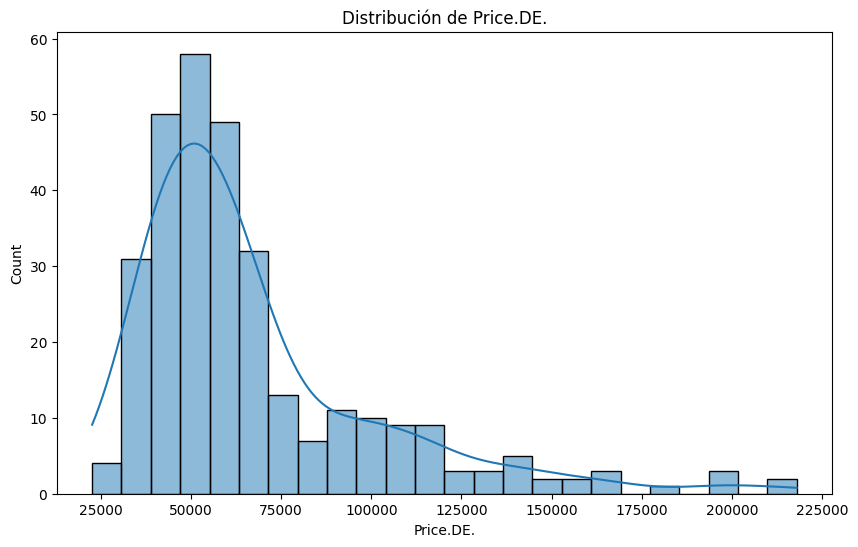

In [7]:
#a histogram for agrupation about the price 
plt.figure(figsize=(10, 6))
sns.histplot(DataF_New['Price.DE.'], kde=True)
plt.title('Distribución de Price.DE.')
plt.show()


In [8]:
#adjust data, through standardization 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standar = scaler.fit_transform(x)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_standar, y, test_size=0.25, random_state=11)


In [9]:
#model retraining 
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)
y_pred_2 = model_2.predict(X_test_2)

mse = mean_squared_error(y_test_2, y_pred_2)
r2 = r2_score(y_test_2, y_pred_2)

print(f'{mse}')
print(f'{r2}')


361844169.55702925
0.6946847644458712


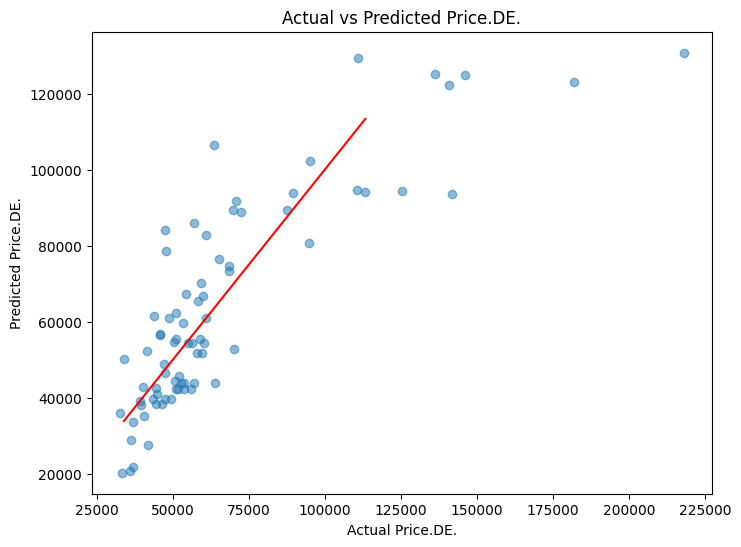

In [10]:
 
# Visualización de las predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test_2, y_pred_2, alpha=0.5)
plt.xlabel('Actual Price.DE.')
plt.ylabel('Predicted Price.DE.')
plt.title('Actual vs Predicted Price.DE.')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()
